# **How to Navigate Through the Notebook:**
You can run the whole notebook, but you may want to check first cells 13, 29, 34, and 35.

**For cell 13:**
Comment this cell if you want to include the "Analysis" attack class in the dataset.

**For cell 29:**
Just check the names of the 3 main models.

**For cell 34:**
Here you can run the original model with the best found hyperparameters or you can change it to one of the ensembled models by replacing ***model*** in model.fit and model.predict with ***ensemble_model***.

**For cell 35:**
You can run this cell if you want to run the 2D CNN model.

---

In [1]:
import pandas as pd
import numpy as np
import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten, Convolution2D, MaxPooling2D, GlobalAveragePooling2D, MaxPooling3D
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
print(pd.__version__)
print(np.__version__)
print(sys.version)
print(sklearn.__version__)

1.3.5
1.21.6
3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
1.0.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/MLData/UNSW_NB15_testing-set.csv')
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [4]:
qp = pd.read_csv('/content/drive/MyDrive/MLData/UNSW_NB15_training-set.csv')
qp

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [5]:
#Dropping the last columns of training set
df = df.drop('id', 1) # we don't need it in this project
df.shape

<ipython-input-5-8b608af03331>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('id', 1) # we don't need it in this project


(175341, 44)

In [6]:
df = df.drop('label', 1) # we don't need it in this project
df

<ipython-input-6-60edcb2e5f24>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('label', 1) # we don't need it in this project


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,24,13,24,0,0,0,24,24,0,Generic
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,1,2,0,0,0,1,1,0,Shellcode
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,3,13,0,0,0,3,12,0,Generic
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,30,14,30,0,0,0,30,30,0,Generic


In [7]:
#Dropping the last columns of TESTING set
qp = qp.drop('id', 1)
qp = qp.drop('label', 1)
qp.shape

<ipython-input-7-029a0cbbdd0d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  qp = qp.drop('id', 1)
<ipython-input-7-029a0cbbdd0d>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  qp = qp.drop('label', 1)


(82332, 43)

In [8]:
df.isnull().values.any()


False

In [9]:
qp.isnull().values.any()


False

In [10]:
#defining col list
cols = ['proto','state','service']
cols

['proto', 'state', 'service']

In [11]:
#One-hot encoding
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, 1)
    return df

In [12]:
#Merging train and test data
combined_data = pd.concat([df,qp])
combined_data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,Normal
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,Normal
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal


In [13]:
"""OPTIONAL"""
# Comment this cell if you want to include the attack class "Analysis" in the dataset
combined_data = combined_data.loc[combined_data["attack_cat"] != 'Analysis']
combined_data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,Normal
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,Normal
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal


In [14]:
# remove the labels to apply preprocessing
tmp = combined_data.pop('attack_cat')


In [15]:
#make combined data one-hot encoded
combined_data = one_hot(combined_data,cols)
#combined_data.shape()

<ipython-input-11-1f2556177dac>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(each, 1)


In [16]:
combined_data


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,0,0,0,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,0,0,0,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,0,0,0,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,1,0,0,0,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,0,0,0,0,0,0,0,0,0,0
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,0,0,0,0,0,0,0,0
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Function to min-max normalize
def normalize(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with normalized specified features
    """
    result = df.copy() # do not touch the original df
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [18]:
#Normalizing training set
new_train_df = normalize(combined_data,combined_data.columns)
new_train_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,2.024634e-03,0.000470,0.000363,0.000016,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.083170e-02,0.001221,0.003449,0.000049,0.002866,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.705215e-02,0.000658,0.001452,0.000024,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.802737e-02,0.001033,0.001089,0.000042,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.490901e-03,0.000845,0.000545,0.000036,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,8.333335e-08,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,0.000000,1.389445e-02,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82328,1.843502e-02,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,0.992126,2.072552e-05,0.000100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82329,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82330,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
tmp #attack catagories


0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
82327    Normal
82328    Normal
82329    Normal
82330    Normal
82331    Normal
Name: attack_cat, Length: 254996, dtype: object

In [20]:
tmp.shape

(254996,)

In [21]:
tmp.value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

In [22]:
#Appending class column to training set
new_train_df["Class"] = tmp
new_train_df

<ipython-input-22-92b49099d310>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_train_df["Class"] = tmp


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,Class
0,2.024634e-03,0.000470,0.000363,0.000016,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1.083170e-02,0.001221,0.003449,0.000049,0.002866,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,2.705215e-02,0.000658,0.001452,0.000024,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,2.802737e-02,0.001033,0.001089,0.000042,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,7.490901e-03,0.000845,0.000545,0.000036,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,8.333335e-08,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,0.000000,1.389445e-02,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
82328,1.843502e-02,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,0.992126,2.072552e-05,0.000100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
82329,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
82330,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [23]:
new_train_df.isnull().values.any()


False

In [24]:
y_train=new_train_df["Class"]
y_train

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
82327    Normal
82328    Normal
82329    Normal
82330    Normal
82331    Normal
Name: Class, Length: 254996, dtype: object

In [25]:
y_train.isnull().values.any()


False

In [26]:
#drop class column again
combined_data_X = new_train_df.drop('Class', 1)
combined_data_X

<ipython-input-26-ee7a9d40ab5e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  combined_data_X = new_train_df.drop('Class', 1)


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,2.024634e-03,0.000470,0.000363,0.000016,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.083170e-02,0.001221,0.003449,0.000049,0.002866,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.705215e-02,0.000658,0.001452,0.000024,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.802737e-02,0.001033,0.001089,0.000042,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.490901e-03,0.000845,0.000545,0.000036,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,8.333335e-08,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,0.000000,1.389445e-02,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82328,1.843502e-02,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,0.992126,2.072552e-05,0.000100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82329,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82330,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
oos_pred = []

In [27]:
# oversampling and undersampling
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
'''
Normal            46500
Generic           29436
Exploits          22263
Fuzzers           12123
DoS                8176
Reconnaissance     6993
Backdoor           1164
Shellcode           756
Worms                87
'''
strategy1 = {'Normal':46500, 'Generic':29436, 'Exploits':22263, 'Fuzzers':12123, 'DoS':8176,
            'Reconnaissance':6993, 'Backdoor':12123, 'Shellcode':46500, 'Worms':46500}
oversample1 = SMOTE(sampling_strategy = strategy1)

strategy2 = {'Normal':46500, 'Generic':29436, 'Exploits':22263, 'Fuzzers':12123, 'DoS':8177,
            'Reconnaissance':6994, 'Backdoor':12123, 'Shellcode':46500, 'Worms':46500}
oversample2 = SMOTE(sampling_strategy = strategy2)
oversample3 = RandomOverSampler(sampling_strategy='minority')
undersample = RandomUnderSampler(sampling_strategy='majority')

In [35]:
# try increasing n_splits: starts decreasing at 9
kfold = StratifiedKFold(n_splits=2,shuffle=True,random_state=42)
kfold.get_n_splits(combined_data_X,y_train)

2

In [29]:
batch_size = 32

"""OPTIONAL"""
#you can call any of these three models in the training cell below

#original model
model = Sequential()
model.add(Reshape((196, 1), input_shape = (196, )))
model.add(Convolution1D(64, kernel_size=64, padding="same",activation="relu",input_shape=(196, 1)))
model.add(MaxPooling1D(pool_size=(10)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Reshape((128, 1), input_shape = (128, )))
model.add(MaxPooling1D(pool_size=(5)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128, return_sequences=False)))
#model.add(Reshape((128, 1), input_shape = (128, )))
model.add(Dropout(0.6))
model.add(Dense(9))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


#2D model
model_2D = Sequential()
model_2D.add(Reshape((14, 14, 1), input_shape = (196, )))
model_2D.add(Convolution2D(64, kernel_size=(3, 3), padding="same",activation="relu",input_shape=(14, 14, 1)))
model_2D.add(MaxPooling2D(pool_size=(2, 2)))
model_2D.add(BatchNormalization())
model_2D.add(Flatten())
model_2D.add(Reshape((56, 56), input_shape = (7, 7, 64))) # 1 sample, 56 time steps, and 56 features at each time step.
model_2D.add(Bidirectional(GRU(128, input_shape=(56, 56), return_sequences=False)))
model_2D.add(Reshape((256, 1), input_shape = (256, )))
model_2D.add(MaxPooling1D(pool_size=(8)))
model_2D.add(BatchNormalization())
model_2D.add(Bidirectional(GRU(128, return_sequences=False)))
#model_2D.add(Reshape((128, 1), input_shape = (128, )))
model_2D.add(Dropout(0.6))
model_2D.add(Dense(10))
model_2D.add(Activation('softmax'))
model_2D.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


#one of the ensembled models
inputs = keras.Input(shape=(196))    
out_1 = model(inputs)
out_2 = model_2D(inputs)
out_all = keras.layers.concatenate([out_1, out_2])
out_all = keras.layers.Dense(10)(out_all)
out_all = (Activation('softmax'))(out_all)
ensemble_model = keras.Model(inputs=inputs, outputs=out_all)
ensemble_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


'''
model_selu = Sequential()
model_selu.add(Convolution1D(64, kernel_size=64, padding="same",activation="selu",input_shape=(196, 1)))
model_selu.add(MaxPooling1D(pool_size=(10)))
model_selu.add(BatchNormalization())
model_selu.add(Bidirectional(LSTM(64, return_sequences=False)))
model_selu.add(Reshape((128, 1), input_shape = (128, )))
model_selu.add(MaxPooling1D(pool_size=(5)))
model_selu.add(BatchNormalization())
model_selu.add(Bidirectional(LSTM(128, return_sequences=False)))
#model.add(Reshape((128, 1), input_shape = (128, )))
model_selu.add(Dropout(0.6))
model_selu.add(Dense(10))
model_selu.add(Activation('softmax'))
model_selu.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_exponential = Sequential()
model_exponential.add(Convolution1D(64, kernel_size=64, padding="same",activation="exponential",input_shape=(196, 1)))
model_exponential.add(MaxPooling1D(pool_size=(10)))
model_exponential.add(BatchNormalization())
model_exponential.add(Bidirectional(LSTM(64, return_sequences=False)))
model_exponential.add(Reshape((128, 1), input_shape = (128, )))
model_exponential.add(MaxPooling1D(pool_size=(5)))
model_exponential.add(BatchNormalization())
model_exponential.add(Bidirectional(LSTM(128, return_sequences=False)))
#model.add(Reshape((128, 1), input_shape = (128, )))
model_exponential.add(Dropout(0.6))
model_exponential.add(Dense(10))
model_exponential.add(Activation('softmax'))
model_exponential.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_sigmoid = Sequential()
model_sigmoid.add(Convolution1D(64, kernel_size=64, padding="same",activation="sigmoid",input_shape=(196, 1)))
model_sigmoid.add(MaxPooling1D(pool_size=(10)))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Bidirectional(LSTM(64, return_sequences=False)))
model_sigmoid.add(Reshape((128, 1), input_shape = (128, )))
model_sigmoid.add(MaxPooling1D(pool_size=(5)))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Bidirectional(LSTM(128, return_sequences=False)))
#model.add(Reshape((128, 1), input_shape = (128, )))
model_sigmoid.add(Dropout(0.6))
model_sigmoid.add(Dense(10))
model_sigmoid.add(Activation('softmax'))
model_sigmoid.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_2D = Sequential()
model_2D.add(Reshape((14, 14, 1), input_shape = (14, 14)))
model_2D.add(Convolution2D(64, kernel_size=(3, 3), padding="same",activation="relu",input_shape=(14, 14, 1)))
model_2D.add(MaxPooling2D(pool_size=(2, 2)))
model_2D.add(BatchNormalization())
model_2D.add(Reshape((56, 56), input_shape = (7, 7, 64))) # 1 sample, 56 time steps, and 56 features at each time step.
model_2D.add(Bidirectional(GRU(128, input_shape=(56, 56), return_sequences=False)))
model_2D.add(Reshape((256, 1), input_shape = (256, )))
model_2D.add(MaxPooling1D(pool_size=(8)))
model_2D.add(BatchNormalization())
model_2D.add(Bidirectional(GRU(128, return_sequences=False)))
#model_2D.add(Reshape((128, 1), input_shape = (128, )))
model_2D.add(Dropout(0.6))
model_2D.add(Dense(10))
model_2D.add(Activation('softmax'))
model_2D.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
'''

'\nmodel_selu = Sequential()\nmodel_selu.add(Convolution1D(64, kernel_size=64, padding="same",activation="selu",input_shape=(196, 1)))\nmodel_selu.add(MaxPooling1D(pool_size=(10)))\nmodel_selu.add(BatchNormalization())\nmodel_selu.add(Bidirectional(LSTM(64, return_sequences=False)))\nmodel_selu.add(Reshape((128, 1), input_shape = (128, )))\nmodel_selu.add(MaxPooling1D(pool_size=(5)))\nmodel_selu.add(BatchNormalization())\nmodel_selu.add(Bidirectional(LSTM(128, return_sequences=False)))\n#model.add(Reshape((128, 1), input_shape = (128, )))\nmodel_selu.add(Dropout(0.6))\nmodel_selu.add(Dense(10))\nmodel_selu.add(Activation(\'softmax\'))\nmodel_selu.compile(loss=\'categorical_crossentropy\',optimizer=\'adam\',metrics=[\'accuracy\'])\n\nmodel_exponential = Sequential()\nmodel_exponential.add(Convolution1D(64, kernel_size=64, padding="same",activation="exponential",input_shape=(196, 1)))\nmodel_exponential.add(MaxPooling1D(pool_size=(10)))\nmodel_exponential.add(BatchNormalization())\nmodel

In [30]:
print("\nmodel layers' outputs' shapes:")
for layer in model.layers:
    print(layer.output_shape)

print("\nmodel_2D layers' outputs' shapes:")
for layer in model_2D.layers:
    print(layer.output_shape)

print("\nensemble_model layers' outputs' shapes:")
for layer in ensemble_model.layers:
    print(layer.output_shape)


model layers' outputs' shapes:
(None, 196, 1)
(None, 196, 64)
(None, 19, 64)
(None, 19, 64)
(None, 128)
(None, 128, 1)
(None, 25, 1)
(None, 25, 1)
(None, 256)
(None, 256)
(None, 9)
(None, 9)

model_2D layers' outputs' shapes:
(None, 14, 14, 1)
(None, 14, 14, 64)
(None, 7, 7, 64)
(None, 7, 7, 64)
(None, 3136)
(None, 56, 56)
(None, 256)
(None, 256, 1)
(None, 32, 1)
(None, 32, 1)
(None, 256)
(None, 256)
(None, 10)
(None, 10)

ensemble_model layers' outputs' shapes:
[(None, 196)]
(None, 9)
(None, 10)
(None, 19)
(None, 10)
(None, 10)


In [31]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 196, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 196, 64)           4160      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 64)           0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 19, 64)           256       
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                        

In [32]:
model_2D.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 14, 14, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 64)         256       
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 reshape_3 (Reshape)         (None, 56, 56)           

In [33]:
ensemble_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 196)]        0           []                               
                                                                                                  
 sequential (Sequential)        (None, 9)            205901      ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 10)           246926      ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 19)           0           ['sequential[0][0]',             
                                                                  'sequential_1[0][0]']       

In [40]:
"""OPTIONAL"""
# you can uncomment the part that has a comment "OVERSAMPLING" above it to use Randomoversampling
# you can uncomment the part that has a comment "SMOTE" above it to use SMOTE oversampling
# you can also run the cell as it is to run the original model with the best found hyperparameters


import os

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

model_pred = []
ensemble_model_pred = []

stop = False
train_X_over = pd.DataFrame
train_y_over = pd.DataFrame
for train_index, test_index in kfold.split(combined_data_X,y_train):
    train_X, test_X = combined_data_X.iloc[train_index], combined_data_X.iloc[test_index]
    train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]
    
    print("train index:",train_index)
    print("test index:",test_index)
    print(train_y.value_counts())
    
    # "SMOTE"
    #if stop == False:
    #  train_X_over,train_y_over= oversample1.fit_resample(train_X, train_y)
    #  print("\nIam here: \n", train_y_over.value_counts())
    #  stop = True
    #else:
    #  train_X_over,train_y_over= oversample2.fit_resample(train_X, train_y)
    #  print("\nIam here: \n", train_y_over.value_counts())

    train_X_over,train_y_over= oversample3.fit_resample(train_X, train_y)
    print("\nIam here2: \n", train_y_over.value_counts())
    
    # "OVERSAMPLING"
    train_X_over,train_y_over= oversample3.fit_resample(train_X_over, train_y_over)
    print("\nIam here3: \n", train_y_over.value_counts())
    # loss: 0.2517 - accuracy: 0.8975 - val_loss: 0.4354 - val_accuracy: 0.8246
    


    #train_X_over,train_y_over= oversample3.fit_resample(train_X_over, train_y_over)
    #print("\nIam here4: \n", train_y_over.value_counts())
    #just overfits, useless, increase fuzzers

    #train_X_over,train_y_over= oversample3.fit_resample(train_X_over, train_y_over)
    #print("\nIam here5: \n", train_y_over.value_counts())
    
    x_columns_train = new_train_df.columns.drop('Class')
    x_train_array = train_X_over[x_columns_train].values
    x_train_1=np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))
    
    print("x_train_array shape", x_train_array.shape)
    print("x_train_1 shape", x_train_1.shape)

    dummies = pd.get_dummies(train_y_over) # Classification
    outcomes = dummies.columns
    num_classes = len(outcomes)
    y_train_1 = dummies.values

    print("train_y_over shape", train_y_over.shape)
    print("y_train_1 shape", y_train_1.shape)
    #print("y_train_1:", y_train_1)

    
    x_columns_test = new_train_df.columns.drop('Class')
    x_test_array = test_X[x_columns_test].values
    x_test_2=np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))
    
    dummies_test = pd.get_dummies(test_y) # Classification
    outcomes_test = dummies_test.columns
    num_classes = len(outcomes_test)
    y_test_2 = dummies_test.values

    print("x_train_1 shape", x_train_1.shape)
    print("y_train_1 shape", y_train_1.shape)
    print("x_test_2 shape", x_test_2.shape)
    print("y_test_2 shape", y_test_2.shape)
    #continue

    model.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=15, callbacks=[cp_callback])
    
    pred = model.predict(x_test_2)
    pred = np.argmax(pred,axis=1)
    y_eval = np.argmax(y_test_2,axis=1)
    score = metrics.accuracy_score(y_eval, pred)
    model_pred.append(score)
    print("Validation score: {}".format(score))

'''
    print("sig=================================================================================================================================\n")
    model_sigmoid.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=15)#, callbacks=[cp_callback])
    
    pred_sig = model.predict(x_test_2)
    pred_sig = np.argmax(pred_sig,axis=1)
    y_eval_sig = np.argmax(y_test_2,axis=1)
    score_sig = metrics.accuracy_score(y_eval_sig, pred_sig)
    model_pred_sig.append(score_sig)
    print("Validation score_sig: {}".format(score_sig))


    print("selu================================================================================================================================\n")
    model_selu.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=15)#, callbacks=[cp_callback])
    
    pred_selu = model.predict(x_test_2)
    pred_selu = np.argmax(pred_selu,axis=1)
    y_eval_selu = np.argmax(y_test_2,axis=1)
    score_selu = metrics.accuracy_score(y_eval_selu, pred_selu)
    model_pred_selu.append(score_selu)
    print("Validation score_selu: {}".format(score_selu))


    print("exp=================================================================================================================================\n")
    model_exponential.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=15)#, callbacks=[cp_callback])
    
    pred_exp = model.predict(x_test_2)
    pred_exp = np.argmax(pred_exp,axis=1)
    y_eval_exp = np.argmax(y_test_2,axis=1)
    score_exp = metrics.accuracy_score(y_eval_exp, pred_exp)
    model_pred_exp.append(score_exp)
    print("Validation score_exp: {}".format(score_exp))
'''

train index: [     1      4      6 ... 254990 254992 254993]
test index: [     0      2      3 ... 254991 254994 254995]
Normal            46500
Generic           29436
Exploits          22263
Fuzzers           12123
DoS                8176
Reconnaissance     6993
Backdoor           1164
Shellcode           756
Worms                87
Name: Class, dtype: int64

Iam here2: 
 Normal            46500
Worms             46500
Generic           29436
Exploits          22263
Fuzzers           12123
DoS                8176
Reconnaissance     6993
Backdoor           1164
Shellcode           756
Name: Class, dtype: int64

Iam here3: 
 Normal            46500
Shellcode         46500
Worms             46500
Generic           29436
Exploits          22263
Fuzzers           12123
DoS                8176
Reconnaissance     6993
Backdoor           1164
Name: Class, dtype: int64
x_train_array shape (219655, 196)
x_train_1 shape (219655, 196, 1)
train_y_over shape (219655,)
y_train_1 shape (219655, 9)
x

'\n    print("sig=================================================================================================================================\n")\n    model_sigmoid.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=15)#, callbacks=[cp_callback])\n    \n    pred_sig = model.predict(x_test_2)\n    pred_sig = np.argmax(pred_sig,axis=1)\n    y_eval_sig = np.argmax(y_test_2,axis=1)\n    score_sig = metrics.accuracy_score(y_eval_sig, pred_sig)\n    model_pred_sig.append(score_sig)\n    print("Validation score_sig: {}".format(score_sig))\n\n\n    print("selu================================================================================================================================\n")\n    model_selu.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=15)#, callbacks=[cp_callback])\n    \n    pred_selu = model.predict(x_test_2)\n    pred_selu = np.argmax(pred_selu,axis=1)\n    y_eval_selu = np.argmax(y_test_2,axis=1)\n    score_selu = metrics.accura

In [ ]:
"""Optional"""
# you can run this cell to use PCA and 2D converted model


from pandas.core.series import Axis
import os

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

model_2D_pred = []

for train_index, test_index in kfold.split(combined_data_X,y_train):
    train_X, test_X = combined_data_X.iloc[train_index], combined_data_X.iloc[test_index]
    train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]
    
    print("train index:",train_index)
    print("test index:",test_index)
    print(train_y.value_counts())
    
    train_X_over,train_y_over= oversample3.fit_resample(train_X, train_y)
    print(train_y_over.value_counts())
    
    x_columns_train = new_train_df.columns.drop('Class')
    x_train_array = train_X_over[x_columns_train].values
    x_train_1=np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))
    #x_train_1=np.reshape(x_train_array, (1, x_train_array.shape[0], x_train_array.shape[1], 1))

    pca = PCA(n_components=144)
    pca.fit(x_train_array)
    x_train_transformed = pca.transform(x_train_array)
    print("x_train_transformed shape", x_train_transformed.shape)
    x_train_transformed = np.reshape(x_train_transformed, (x_train_array.shape[0], 12, 12))

    print("x_train_array shape", x_train_array.shape)
    print("x_train_1 shape", x_train_1.shape)
    print("x_train_transformed shape", x_train_transformed.shape)

    dummies = pd.get_dummies(train_y_over) # Classification
    outcomes = dummies.columns
    num_classes = len(outcomes)
    y_train_1 = dummies.values
    #y_train_1 = np.reshape(y_train_1, (1, y_train_1.shape[0], y_train_1.shape[1], 1))

    print("train_y_over shape", train_y_over.shape)
    print("y_train_1 shape", y_train_1.shape)
    print("y_train_1:", y_train_1)

    
    x_columns_test = new_train_df.columns.drop('Class')
    x_test_array = test_X[x_columns_test].values
    x_test_2=np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))
    #x_test_2=np.reshape(x_test_array, (1, x_test_array.shape[0], x_test_array.shape[1], 1))
    
    pca.fit(x_test_array)
    x_test_transformed = pca.transform(x_test_array)
    x_test_transformed = np.reshape(x_test_transformed, (x_test_array.shape[0], 12, 12))
    
    print("x_test_array shape", x_test_array.shape)
    print("x_test_2 shape", x_test_2.shape)
    print("x_test_transformed shape", x_test_transformed.shape)

    dummies_test = pd.get_dummies(test_y) # Classification
    outcomes_test = dummies_test.columns
    num_classes = len(outcomes_test)
    y_test_2 = dummies_test.values
    #y_test_2 = np.reshape(y_test_2, (1, y_test_2.shape[0], y_test_2.shape[1], 1), Axis = 1)

    model_2D.fit(x_train_transformed, y_train_1,validation_data=(x_test_transformed,y_test_2), epochs=15)#, callbacks=[cp_callback])
    
    pred = model_2D.predict(x_test_transformed)
    pred = np.argmax(pred,axis=1)
    y_eval = np.argmax(y_test_2,axis=1)
    score = metrics.accuracy_score(y_eval, pred)
    model_2D_pred.append(score)
    print("Validation score: {}".format(score))

train index: [     1      4      6 ... 257667 257669 257670]
test index: [     0      2      3 ... 257668 257671 257672]
Normal            46500
Generic           29435
Exploits          22262
Fuzzers           12123
DoS                8177
Reconnaissance     6994
Analysis           1339
Backdoor           1164
Shellcode           755
Worms                87
Name: Class, dtype: int64
Normal            46500
Worms             46500
Generic           29435
Exploits          22262
Fuzzers           12123
DoS                8177
Reconnaissance     6994
Analysis           1339
Backdoor           1164
Shellcode           755
Name: Class, dtype: int64
x_train_transformed shape (175249, 144)
x_train_array shape (175249, 196)
x_train_1 shape (175249, 196, 1)
x_train_transformed shape (175249, 12, 12)
train_y_over shape (175249,)
y_train_1 shape (175249, 10)
y_train_1: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
x_test_a

In [41]:
pred


array([5, 5, 5, ..., 7, 5, 5])

In [42]:
model_pred


[0.8144519914037868, 0.8213932767572825]

In [43]:
test_y.value_counts()


Normal            46500
Generic           29436
Exploits          22263
Fuzzers           12123
DoS                8176
Reconnaissance     6993
Backdoor           1164
Shellcode           756
Worms                87
Name: Class, dtype: int64

In [44]:
dummies_test.columns


Index(['Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal',
       'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

In [58]:
from sklearn.metrics import confusion_matrix


In [59]:
confussion_matrix=confusion_matrix(y_eval, pred, labels=[0, 1, 2, 3, 4, 5,6, 7, 8, 9])


In [60]:
confussion_matrix


array([[   59,    11,   863,   188,     2,     5,     6,    27,     3,
            0],
       [    5,   405,  7208,   251,    12,    94,    53,   144,     4,
            0],
       [   11,   152, 20103,   633,    57,   472,   327,   378,   130,
            0],
       [    0,    11,  1182,  6611,     7,  3796,   201,   306,     9,
            0],
       [    3,    48,   501,    32, 28783,    16,     5,    43,     5,
            0],
       [    1,    18,   368,  2180,     5, 43363,   255,   302,     8,
            0],
       [    5,    12,  1608,    40,     7,    77,  4654,   585,     5,
            0],
       [    0,     2,    16,    13,     0,    18,    25,   682,     0,
            0],
       [    0,     2,    15,     0,     0,     2,     0,     2,    66,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])

In [61]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

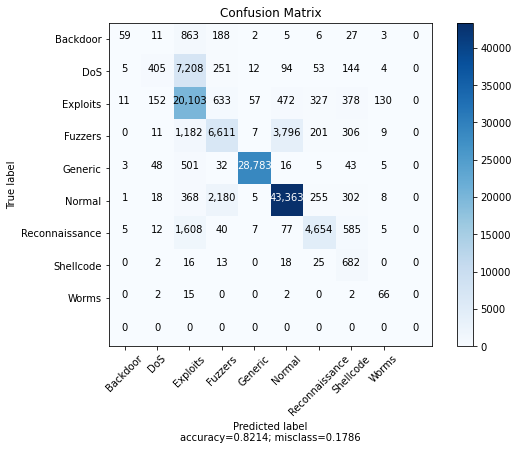

In [62]:
plot_confusion_matrix(cm           = confussion_matrix, 
                      normalize    = False,
                      target_names = ['Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms'],
                      title        = "Confusion Matrix")

In [63]:
target_class=[]
target_class=["Backdoor","DoS", "Exploits", "Fuzzers", "Generic","Normal","Reconnaissance", "Shellcode", "Worms"]

In [64]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [65]:
pred1 = model.predict(x_test_2)


3985/3985 [==============================] - 20s 5ms/step


<ipython-input-66-a1f5335befb9>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


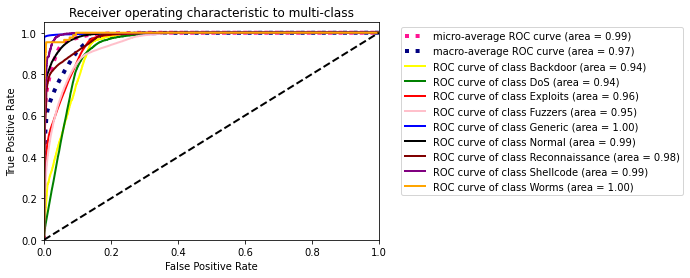

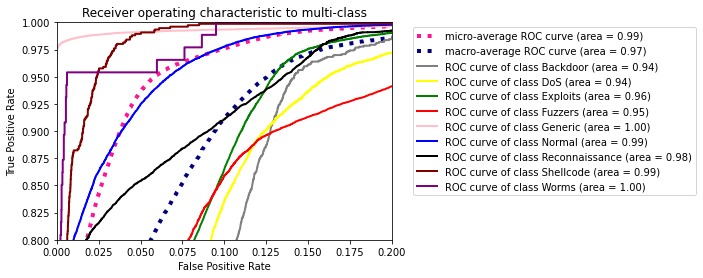

In [66]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(9):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(9)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(9):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 9

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['yellow', 'green','red','pink','blue','black','maroon','purple','orange'])
for i, color in zip(range(9), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(target_class[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#zoom in the plot
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['grey', 'yellow', 'green','red','pink','blue','black','maroon','purple','orange'])
for i, color in zip(range(9), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(target_class[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()